# Regresja liniowa
## Mateusz Baran
### 155620

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn

### Naszym zadaniem jest przewidywanie widzialności (SecchDisc) w wodzie  (y - output) na podstawie stężenia zawiesiny (SS) (x - input).

In [80]:
# load dataset
dataset = pd.read_csv('data/Kruk_VLagun_156.csv')
dataset.head()

,PSU,O2,SecchDisc,temp.,SS,chla,SRP,DOP,PP,TP,...,DOC,TPOC,PhytoBiomassC,CyanobacteriaBiomassC,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Airtemperature,Windspeedinsitu,Depth
0,3.757624,9.46,0.60,18.3,52.0,39.32,3.5,11.7,185.0,200.2,...,7.500,8.5650,1.76,0.43,0.51,0.02,0.69,21.7,3.5,3.3
1,3.504707,9.89,0.60,19.1,50.0,45.87,4.4,17.5,111.3,133.2,...,7.860,8.5200,2.15,1.09,0.47,0.00,0.52,21.6,0.0,3.6
2,3.757624,9.66,0.50,18.1,59.0,19.66,3.2,22.8,103.4,129.4,...,8.172,8.4915,2.60,1.73,0.27,0.02,0.54,24.9,1.0,3.4
3,3.107266,10.36,0.50,19.5,46.0,16.38,4.3,22.3,92.7,119.3,...,7.848,8.8320,2.06,0.81,0.46,0.12,0.66,25.1,0.0,2.9
4,2.619498,11.56,0.45,19.0,42.0,9.83,11.7,30.3,73.2,115.2,...,7.536,9.2400,2.08,1.13,0.33,0.08,0.18,22.5,0.0,3.0


In [81]:
dataset.describe()

,PSU,O2,SecchDisc,temp.,SS,chla,SRP,DOP,PP,TP,...,DOC,TPOC,PhytoBiomassC,CyanobacteriaBiomassC,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Airtemperature,Windspeedinsitu,Depth
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.356954,10.180705,0.376026,17.350000,86.937115,58.011474,15.034615,22.421154,134.547436,172.003205,...,8.206301,9.706078,2.129615,0.709808,0.592436,0.112115,0.619231,19.450000,4.985897,3.024359
std,0.758865,1.078504,0.115147,3.122251,35.506823,33.122486,11.842344,19.531893,51.210224,51.697205,...,1.025776,2.589192,0.888037,0.530066,0.309028,0.118436,0.337919,4.912624,2.621043,0.538501
min,1.400000,7.620000,0.200000,10.600000,29.000000,0.000000,0.000000,0.700000,20.900000,61.300000,...,6.457500,3.916500,0.480000,0.020000,0.100000,0.000000,0.080000,11.000000,0.000000,1.500000
25%,2.800000,9.367500,0.300000,16.200000,60.000000,32.760000,7.475000,9.000000,99.950000,133.050000,...,7.409525,8.040000,1.580000,0.240000,0.370000,0.030000,0.350000,15.950000,3.000000,2.700000
50%,3.379124,9.955000,0.350000,17.900000,80.000000,53.515000,12.250000,15.750000,131.500000,168.650000,...,8.044000,9.414100,2.085000,0.630000,0.535000,0.075000,0.610000,20.250000,5.000000,3.200000
75%,3.957258,10.890000,0.450000,20.100000,111.562500,81.910000,19.875000,30.825000,167.700000,206.800000,...,8.842500,11.387875,2.690000,1.022500,0.762500,0.150000,0.860000,22.125000,6.850000,3.400000
max,4.600000,12.890000,0.700000,20.700000,217.500000,170.370000,88.200000,91.100000,285.100000,327.600000,...,10.860000,17.420000,4.840000,2.860000,1.970000,0.760000,1.390000,33.200000,11.500000,3.900000


In [82]:
dataset.shape

(156, 30)

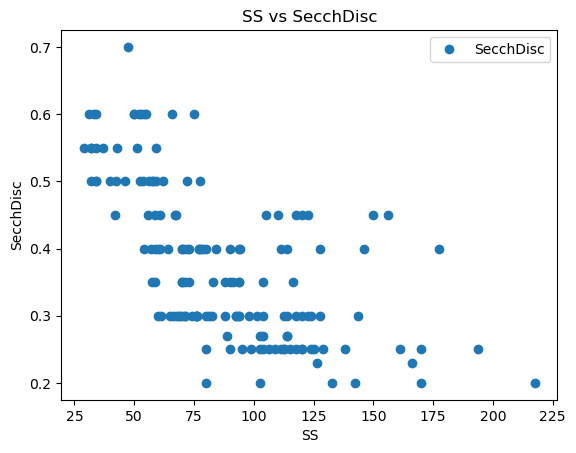

In [83]:
dataset.plot(x='SS', y='SecchDisc', style='o')
plt.title('SS vs SecchDisc')
plt.xlabel('SS')
plt.ylabel('SecchDisc')
plt.show()

/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_5170/1339026515.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(dataset['SS'])


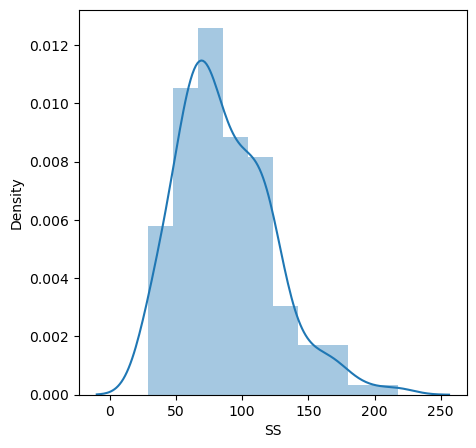

In [84]:
plt.figure(figsize=(5,5))
plt.tight_layout()
seaborn.distplot(dataset['SS'])
plt.show()

In [85]:
X = dataset['SS'].values.reshape(-1,1)
y = dataset['SecchDisc'].values.reshape(-1,1)

In [86]:
X

array([[ 52.  ],
       [ 50.  ],
       [ 59.  ],
       [ 46.  ],
       [ 42.  ],
       [ 59.  ],
       [ 72.  ],
       [ 58.  ],
       [ 62.  ],
       [ 55.  ],
       [ 53.  ],
       [ 50.  ],
       [ 54.  ],
       [ 51.  ],
       [ 61.  ],
       [ 66.  ],
       [ 53.75],
       [ 42.5 ],
       [ 56.25],
       [ 67.5 ],
       [ 70.  ],
       [ 68.75],
       [ 52.5 ],
       [ 57.5 ],
       [ 47.5 ],
       [ 75.  ],
       [ 77.5 ],
       [ 80.  ],
       [ 91.25],
       [116.25],
       [ 58.6 ],
       [ 57.14],
       [ 55.71],
       [ 58.57],
       [ 67.14],
       [ 71.25],
       [ 57.5 ],
       [ 60.  ],
       [ 60.  ],
       [ 68.75],
       [ 84.29],
       [ 77.14],
       [ 78.57],
       [ 77.14],
       [ 72.86],
       [ 71.43],
       [ 70.  ],
       [ 74.29],
       [ 64.29],
       [ 75.71],
       [ 72.86],
       [ 94.29],
       [ 82.86],
       [ 54.29],
       [ 75.71],
       [ 94.  ],
       [ 90.  ],
       [ 98.  ],
       [120.  

In [87]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
# train linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
print(f'Intercept {regressor.intercept_}')
print(f'Coef {regressor.coef_}')

Intercept [0.56876331]
Coef [[-0.00222281]]


In [90]:
# check predictions
y_pred = regressor.predict(X_test)

In [91]:
df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten(),
})
df

,Actual,Predicted
0,0.50,0.396496
1,0.30,0.400475
2,0.40,0.435395
3,0.23,0.199222
4,0.70,0.463180
5,0.50,0.439841
6,0.30,0.409988
7,0.20,0.340926
8,0.30,0.421502
9,0.40,0.381403


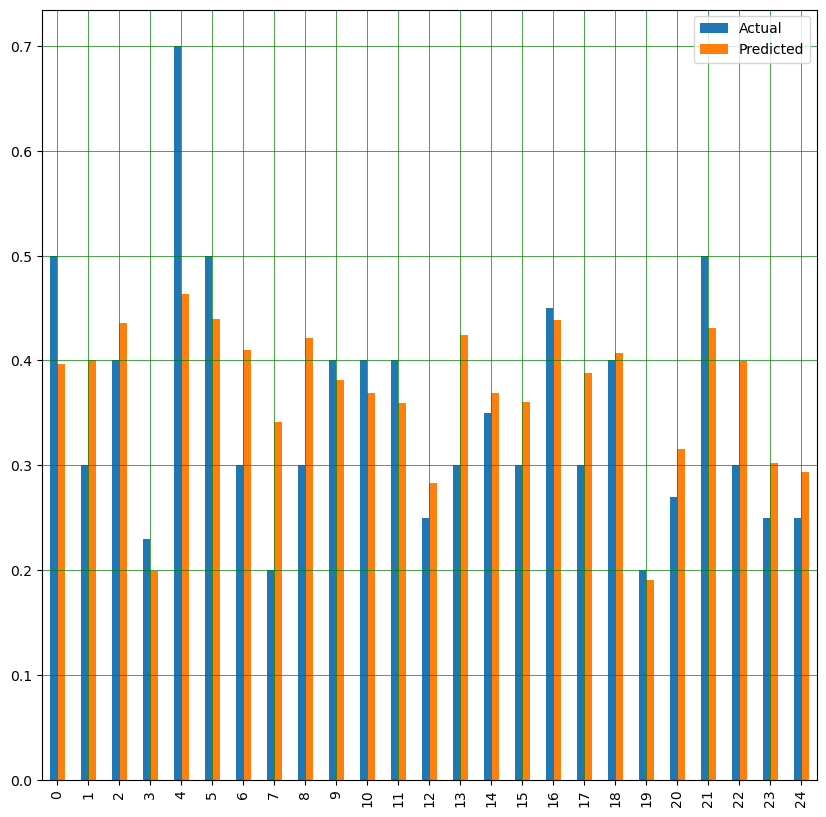

In [92]:
df.head(25).plot(kind='bar', figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

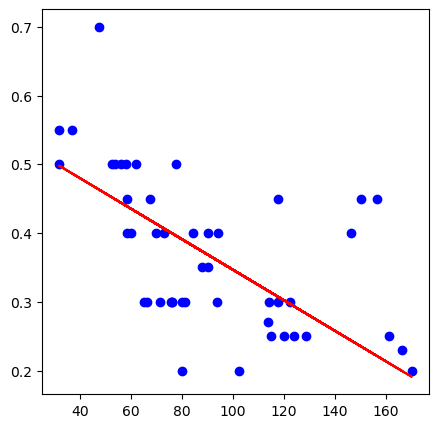

In [93]:
# plot linear regression 
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07070595806942295
Mean Squared Error: 0.008590435611308487
Root Mean Squared Error: 0.09268460288153846
